In [1]:
'''Example 1'''

'Example 1'

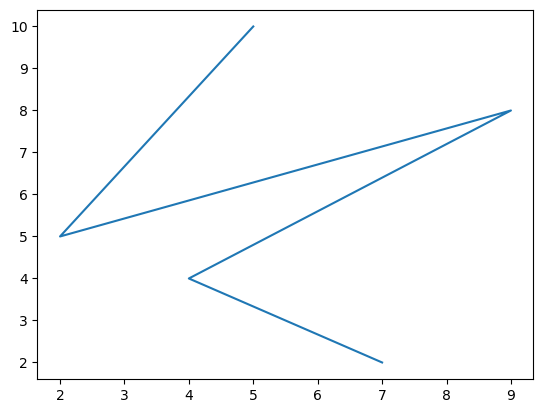

In [3]:
from matplotlib import pyplot as plt
x = [5, 2, 9, 4, 7]
y = [10,5, 8,4, 2]
plt.plot(x,y)
plt.show()

In [4]:
'''Example 2'''

'Example 2'

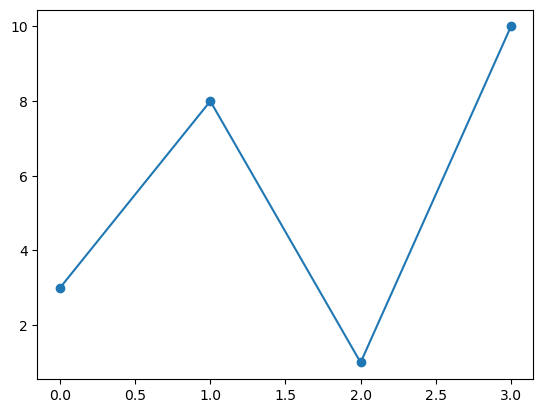

In [5]:
import matplotlib.pyplot as plt
import numpy as np
y = np.array([3, 8, 1, 10])
plt.plot(y, marker = 'o')
plt.show()

In [6]:
''' Sinh viên thực hành các ví dụ còn lại của Chương'''

' Sinh viên thực hành các ví dụ còn lại của Chương'

In [7]:
'''4. Thực hành - Bài 1. Vẽ biểu đồ tài chính'''

'4. Thực hành - Bài 1. Vẽ biểu đồ tài chính'

In [11]:
pip install cufflinks

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [12]:
import matplotlib.pyplot as plt
import pandas as pd 
import cufflinks as cf # Kết nối pandas với plotly, cho phép trực quan hóa nhanh chóng trực tiếp từ các DataFrame
import plotly.offline as plyo # Để hiển thị (render) biểu đồ Plotly mà không cần kết nối Internet
raw = pd.read_csv('fxcm_eur_usd_eod_data.csv', index_col=0, parse_dates=True) 
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']] # Lọc DataFrame để chỉ giữ lại các cột cần thiết cho biểu đồ nến (candlestick charts)
quotes = quotes.iloc[-60:]# Chỉ giữ lại 60 dòng cuối cùng, thường để tập trung vào dữ liệu thị trường gần đây
quotes.tail()

AskOpen  AskHigh   AskLow  AskClose
2017-12-25 22:00:00  1.18667  1.18791  1.18467   1.18587
2017-12-26 22:00:00  1.18587  1.19104  1.18552   1.18885
2017-12-27 22:00:00  1.18885  1.19592  1.18885   1.19426
2017-12-28 22:00:00  1.19426  1.20256  1.19369   1.20092
2017-12-31 22:00:00  1.20092  1.20144  1.19994   1.20144

In [13]:
qf = cf.QuantFig(quotes,
                 title='EUR/USD Exchange Rate',
                 legend='top',
                 name='EUR/USD')


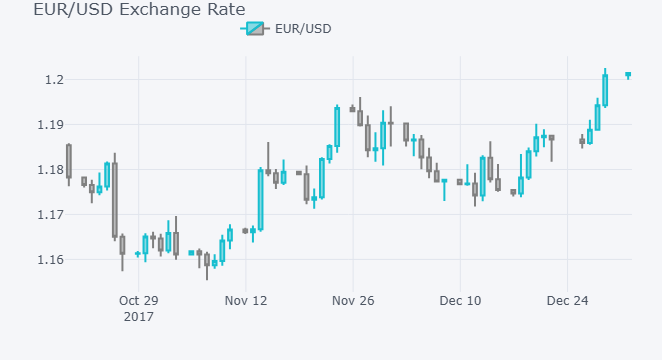

In [14]:
plyo.iplot(qf.iplot(asFigure=True),image='png', filename='qf_01')
plt.show()

In [15]:
'''4. Thực hành - Bài 2. Vẽ biểu đồ phân tích tài chính'''

'4. Thực hành - Bài 2. Vẽ biểu đồ phân tích tài chính'

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

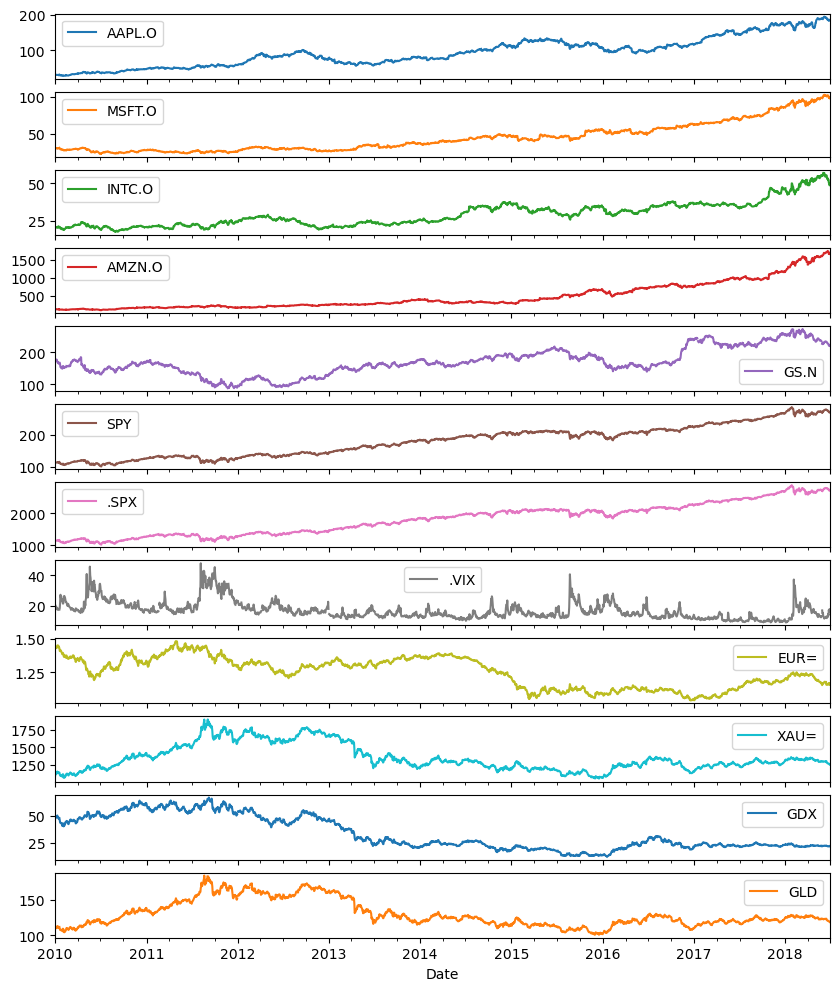

In [17]:
import numpy as np
import pandas as pd
from pylab import mpl, plt

filename = 'tr_eikon_eod_data.csv'
data = pd.read_csv(filename,index_col=0, parse_dates=True)

data.plot(figsize=(10, 12), subplots=True)#trực quan hóa toàn bộ tập dữ liệu thông qua nhiều biểu đồ con (subplots)


C:\Users\HP\AppData\Local\Temp\ipykernel_15432\3581199186.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



<Axes: >

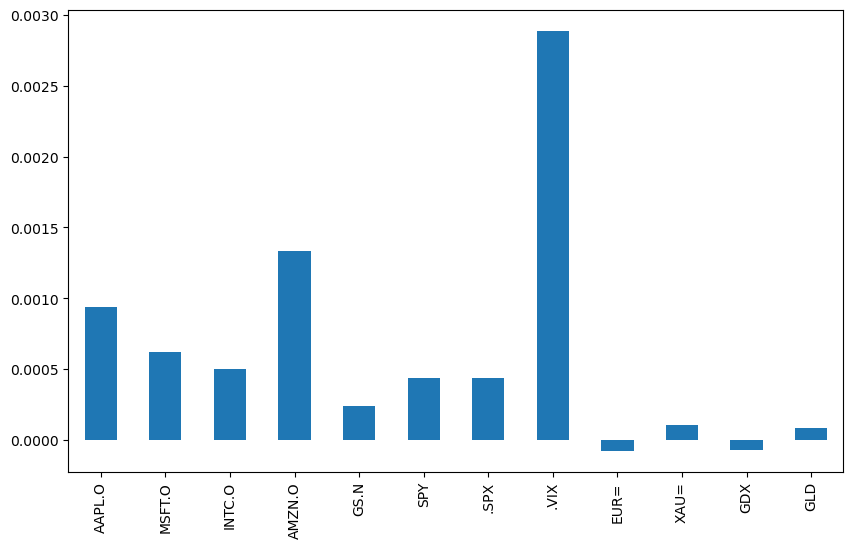

In [18]:
data.pct_change().mean().plot(kind='bar', figsize=(10, 6)) 
# Giá trị trung bình của các kết quả được trực quan hóa dưới dạng biểu đồ cột (bar plot

In [19]:
rets = np.log(data / data.shift(1))# Tính lợi nhuận theo hàm log
rets.head().round(3)  # Tạo tập dữ liệu con.

AAPL.O  MSFT.O  INTC.O  AMZN.O   GS.N    SPY   .SPX   .VIX   EUR=  \
Date                                                                            
2010-01-01     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN    NaN   
2010-01-04     NaN     NaN     NaN     NaN    NaN    NaN    NaN    NaN  0.006   
2010-01-05   0.002   0.000  -0.000   0.006  0.018  0.003  0.003 -0.035 -0.003   
2010-01-06  -0.016  -0.006  -0.003  -0.018 -0.011  0.001  0.001 -0.010  0.003   
2010-01-07  -0.002  -0.010  -0.010  -0.017  0.019  0.004  0.004 -0.005 -0.007   

             XAU=    GDX    GLD  
Date                             
2010-01-01    NaN    NaN    NaN  
2010-01-04  0.021    NaN    NaN  
2010-01-05 -0.001  0.010 -0.001  
2010-01-06  0.018  0.024  0.016  
2010-01-07 -0.006 -0.005 -0.006

<Axes: xlabel='Date'>

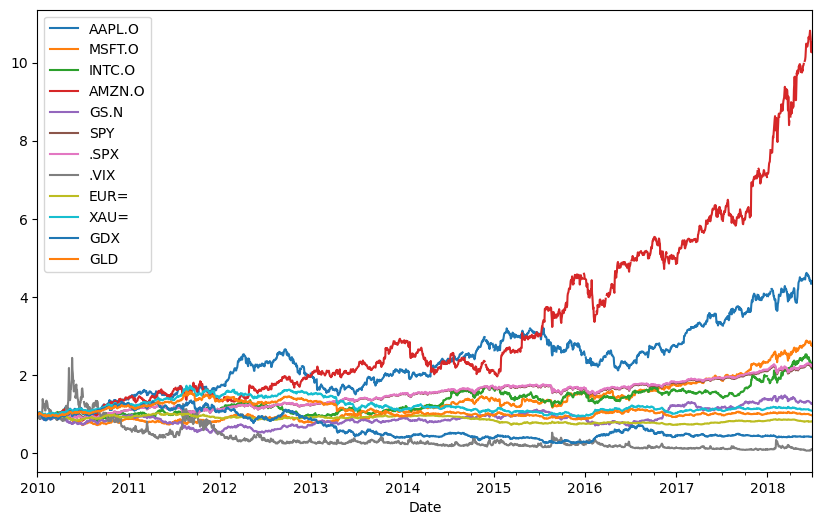

In [20]:
rets.cumsum().apply(np.exp).plot(figsize=(10, 6))
# Vẽ đồ thị lợi nhuận log tích lũy theo thời gian; trước tiên gọi phương thức cumsum(), sau đó áp dụng np.exp() lên kết quả. 

In [21]:
#Thống kê dạng cuộn (rolling statistics)
sym = 'AAPL.O' 
data = pd.DataFrame(data[sym]).dropna()
data.tail()

AAPL.O
Date              
2018-06-25  182.17
2018-06-26  184.43
2018-06-27  184.16
2018-06-28  185.50
2018-06-29  185.11

In [22]:
window = 20 # Xác định cửa sổ; tức là số lượng giá trị chỉ mục cần bao gồm
data['min'] = data[sym].rolling(window=window).min()# Tính giá trị nhỏ nhất trong cửa sổ trượt 
data['mean'] = data[sym].rolling(window=window).mean()# Tính giá trị trung bình trong cửa sổ trượt. 
data['max'] = data[sym].rolling(window=window).max()# Tính giá trị lớn nhất trong cửa sổ trượt. 
data.dropna().head()

AAPL.O        min       mean        max
Date                                                  
2010-02-01  27.818544  27.437544  29.580892  30.719969
2010-02-02  27.979972  27.437544  29.451249  30.719969
2010-02-03  28.461400  27.437544  29.343035  30.719969
2010-02-04  27.435687  27.435687  29.207892  30.719969
2010-02-05  27.922829  27.435687  29.099892  30.719969

<Axes: xlabel='Date'>

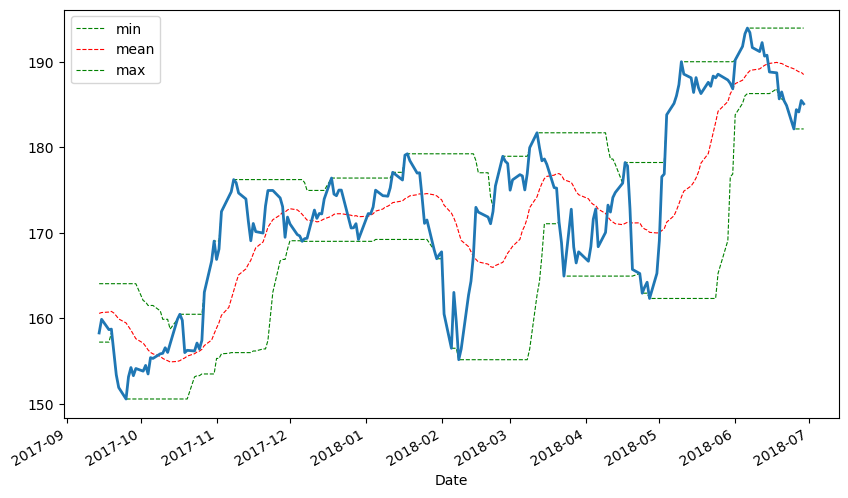

In [23]:
ax = data[['min', 'mean', 'max']].iloc[-200:].plot(figsize=(10, 6), 
                                       style=['g--', 'r--', 'g--'], 
                                       lw=0.8)
# Vẽ ba thống kê dạng cuộn (rolling statistics) cho 200 dòng dữ liệu cuối cùng.  
data[sym].iloc[-200:].plot(ax=ax, lw=2.0)
# Thêm dữ liệu chuỗi thời gian gốc vào biểu đồ.


In [24]:
data['SMA1'] = data[sym].rolling(window=42).mean() # Tính toán các giá trị cho Đường Trung bình Động đơn giản (SMA) ngắn hạn
data['SMA2'] = data[sym].rolling(window=252).mean() # Tính toán các giá trị cho Đường Trung bình Động đơn giản (SMA) dài hạn
data[[sym, 'SMA1', 'SMA2']].tail()


AAPL.O        SMA1        SMA2
Date                                      
2018-06-25  182.17  185.606190  168.265556
2018-06-26  184.43  186.087381  168.418770
2018-06-27  184.16  186.607381  168.579206
2018-06-28  185.50  187.089286  168.736627
2018-06-29  185.11  187.470476  168.901032

<Axes: xlabel='Date'>

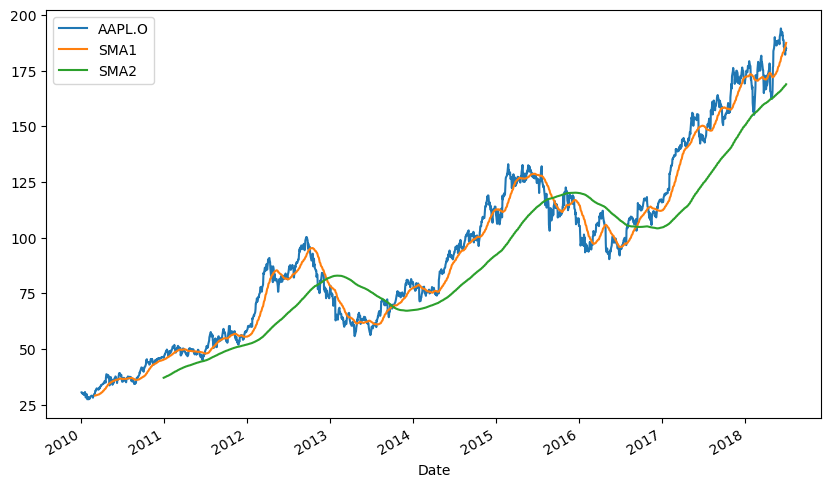

In [25]:
data[[sym, 'SMA1', 'SMA2']].plot(figsize=(10, 6)) #Hiển thị dữ liệu giá cổ phiếu cùng với hai chuỗi thời gian SMA
# Giá cổ phiếu Apple và hai đường trung bình động đơn giản (SMA).


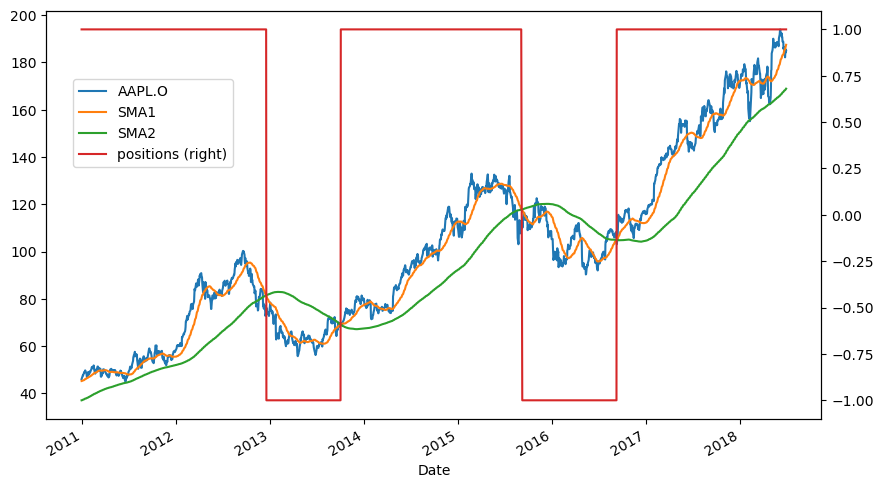

In [26]:
# Vẽ biểu đồ Giá cổ phiếu Apple, hai đường trung bình động đơn giản và vị thế giao dịch.
data.dropna(inplace=True) # Chỉ giữ lại các hàng dữ liệu đầy đủ.
data['positions'] = np.where(data['SMA1'] > data['SMA2'],# Nếu giá trị SMA ngắn hạn lớn hơn SMA dài hạn … 
                             1, # … mua vào cổ phiếu (put 1)                            
                            -1) # Ngược lại, bán khống cổ phiếu (put a -1).

ax = data[[sym, 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6), secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));




In [27]:
'''4. Thực hành - Bài 3. Vẽ biểu đồ phân tích sự tương quan'''

'4. Thực hành - Bài 3. Vẽ biểu đồ phân tích sự tương quan'

In [28]:
'''Bộ dữ liệu hiện bao gồm hai chuỗi thời gian tài chính, cả hai đều được trực quan hóa trong Hình.'''

'Bộ dữ liệu hiện bao gồm hai chuỗi thời gian tài chính, cả hai đều được trực quan hóa trong Hình.'

In [30]:
raw = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = raw[['.SPX', '.VIX']].dropna()
data.tail()

.SPX   .VIX
Date                      
2018-06-25  2717.07  17.33
2018-06-26  2723.06  15.92
2018-06-27  2699.63  17.91
2018-06-28  2716.31  16.85
2018-06-29  2718.37  16.09

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

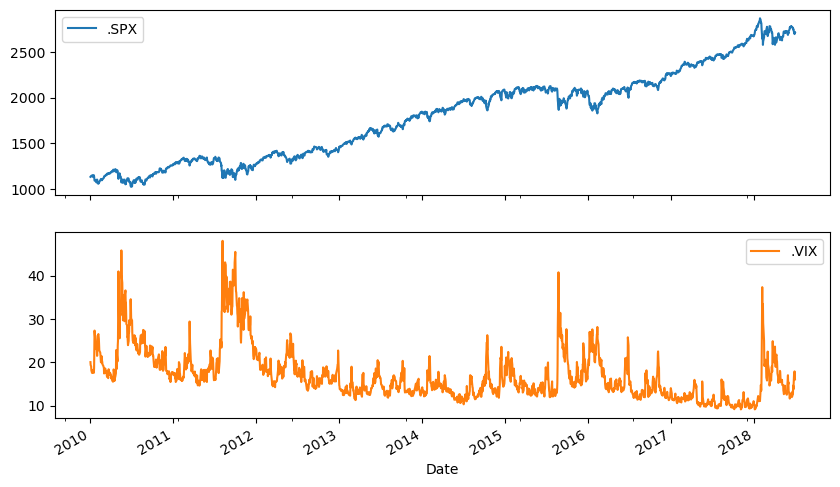

In [31]:
data.plot(subplots=True, figsize=(10, 6)) # Dữ liệu chuỗi thời gian S&P 500 và VIX (trên các biểu đồ con khác nhau)

<Axes: xlabel='Date'>

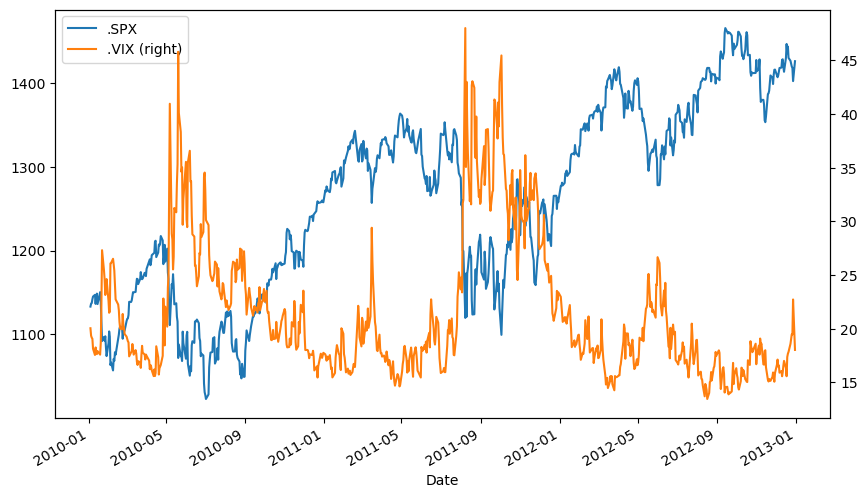

In [32]:
data.loc[:'2012-12-31'].plot(secondary_y='.VIX', figsize=(10, 6)) #chọn dữ liệu đến giá trị DATE được chỉ định
#Dữ liệu chuỗi thời gian S&P 500 và VIX (trên cùng một biểu đồ).


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

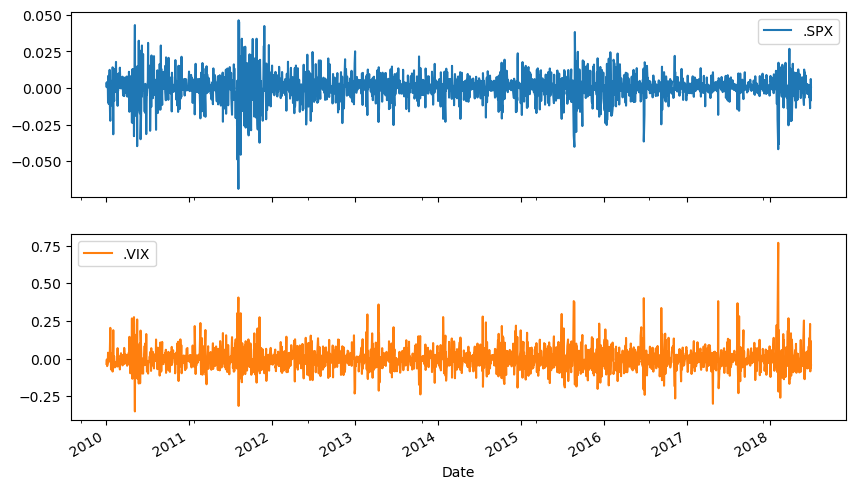

In [33]:
# Vẽ biểu đồ Lợi suất logarit của S&P 500 và VIX theo thời gian
rets = np.log(data / data.shift(1)) 
rets.head()
rets.dropna(inplace=True)
rets.plot(subplots=True, figsize=(10, 6))

array([[<Axes: xlabel='.SPX', ylabel='.SPX'>,
        <Axes: xlabel='.VIX', ylabel='.SPX'>],
       [<Axes: xlabel='.SPX', ylabel='.VIX'>,
        <Axes: xlabel='.VIX', ylabel='.VIX'>]], dtype=object)

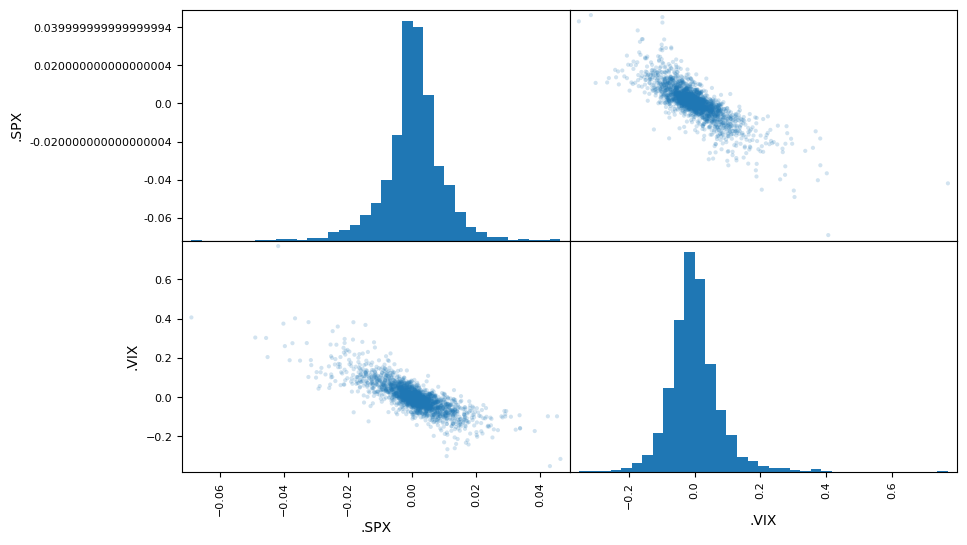

In [34]:
# Vẽ biểu đồ Lợi suất logarit của S&P 500 và VIX dưới dạng ma trận phân tán (scatter matrix).
pd.plotting.scatter_matrix(rets, #Dữ liệu để vẽ biểu đồ.                            
                        alpha=0.2,# Tham số alpha để điều chỉnh độ mờ của các điểm.
                        diagonal='hist',# Một biểu đồ tần suất (histogram)của dữ liệu trong cột.
                        hist_kwds={'bins': 35},# Các từ khóa (keywords) được truyền vào hàm vẽ biểu đồ histogram
                        figsize=(10, 6))



In [35]:
''' Thực hiện hồi quy OLS (Ordinary Least Squares).
Biểu đồ phân tán của lợi suất logarit kèm đường hồi quy cho thấy độ dốc âm rõ ràng, chứng tỏ hai chỉ số này có mối tương quan âm.'''


' Thực hiện hồi quy OLS (Ordinary Least Squares).\nBiểu đồ phân tán của lợi suất logarit kèm đường hồi quy cho thấy độ dốc âm rõ ràng, chứng tỏ hai chỉ số này có mối tương quan âm.'

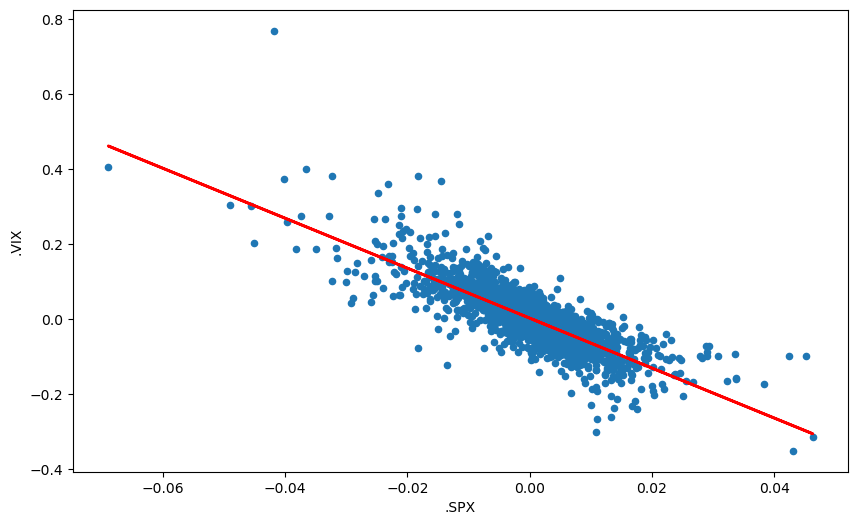

In [36]:
# Vẽ biểu đồ Lợi suất logarit của S&P 500 và VIX dưới dạng ma trận phân tán
reg = np.polyfit(rets['.SPX'], rets['.VIX'], deg=1) # thực hiện hồi quy tuyến tính OLS
ax = rets.plot(kind='scatter', x='.SPX', y='.VIX', figsize=(10, 6)) # vẽ lợi suất logarit dưới dạng biểu đồ phân tán
ax.plot(rets['.SPX'], np.polyval(reg, rets['.SPX']), 'r', lw=2) #Đường hồi quy tuyến tính được thêm vào

In [37]:
rets.corr()# Ma trận tương quan cho toàn bộ DataFrame. 

.SPX      .VIX
.SPX  1.000000 -0.804382
.VIX -0.804382  1.000000

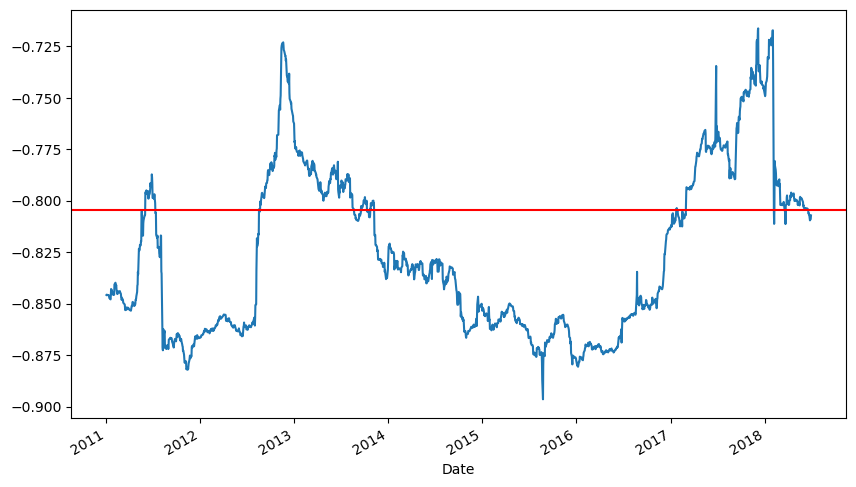

In [38]:
# Vẽ biểu đồ Tương quan giữa S&P 500 và VIX (cố định và theo cuộn thời gian)
ax = rets['.SPX'].rolling(window=252).corr( rets['.VIX']).plot(figsize=(10, 6)) # Vẽ biểu đồ tương quan theo thời gian
ax.axhline(rets.corr().iloc[0, 1], c='r') # và thêm giá trị tĩnh vào biểu đồ dưới dạng đường ngang.

In [39]:
'''4. Thực hành - Bài 4. Vẽ biểu đồ dữ liệu High-Frequency'''

'4. Thực hành - Bài 4. Vẽ biểu đồ dữ liệu High-Frequency'

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 461357 entries, 2018-06-29 00:00:00.082000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Bid     461357 non-null  float64
 1   Ask     461357 non-null  float64
dtypes: float64(2)
memory usage: 10.6 MB


<Axes: >

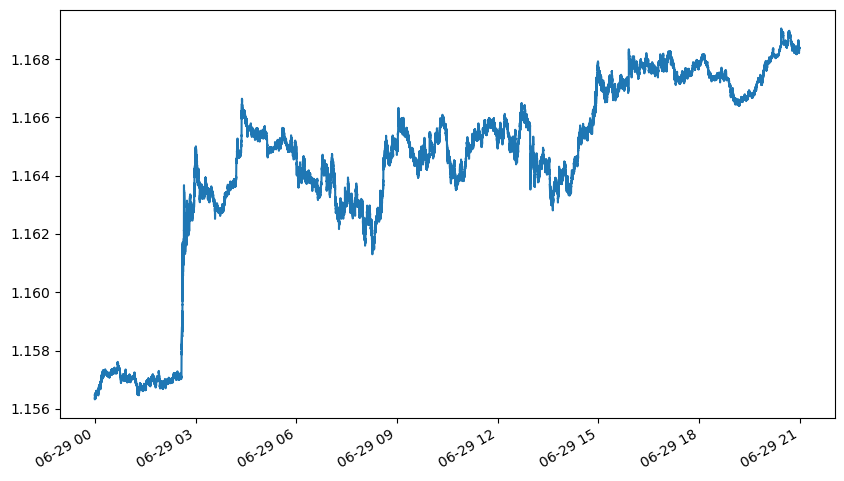

In [40]:
tick = pd.read_csv('fxcm_eur_usd_tick_data.csv', index_col=0, parse_dates=True)
tick.info()
tick['Mid'] = tick.mean(axis=1) # Tính giá trị trung bình của mỗi hàng.
tick['Mid'].plot(figsize=(10, 6)) # Vẽ biểu đồ dữ liệu tick cho tỷ giá hối đoái EUR/USD

<Axes: >

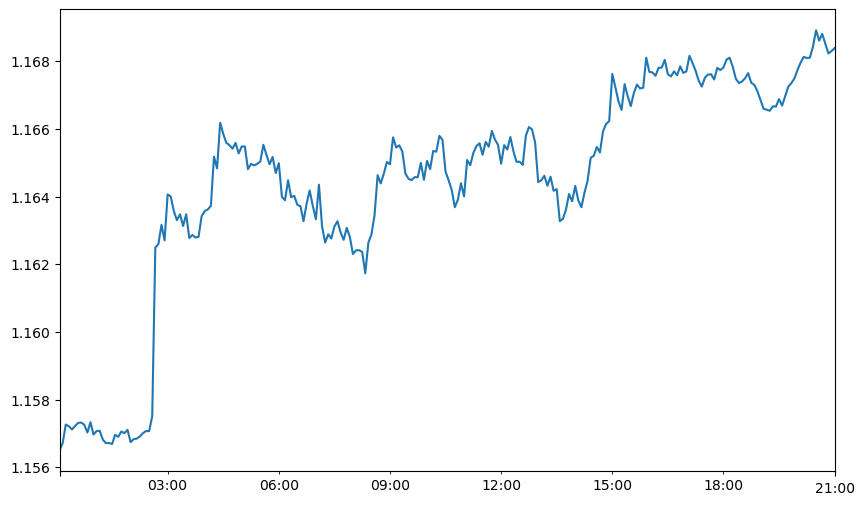

In [41]:
tick_resam = tick.resample(rule='5min', label='right').last()
tick_resam.head()
tick_resam['Mid'].plot(figsize=(10, 6)) # Vẽ biểu đồ dữ liệu nến 5 phút cho tỷ giá hối đoái EUR/USD.
